Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/01/14 21:42:47 WARN Utils: Your hostname, gpuana02, resolves to a loopback address: 127.0.1.1; using 192.168.1.216 instead (on interface enp4s0)
26/01/14 21:42:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
26/01/14 21:42:47 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


Statistics:
[[    0.     0.     0.]
 [    0. 11601.     0.]
 [    0.    20.     0.]]


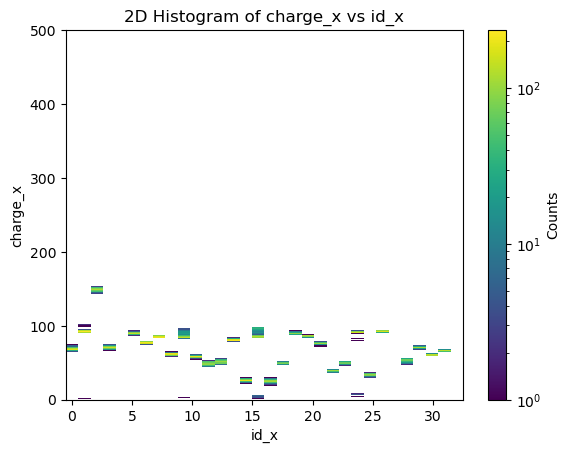

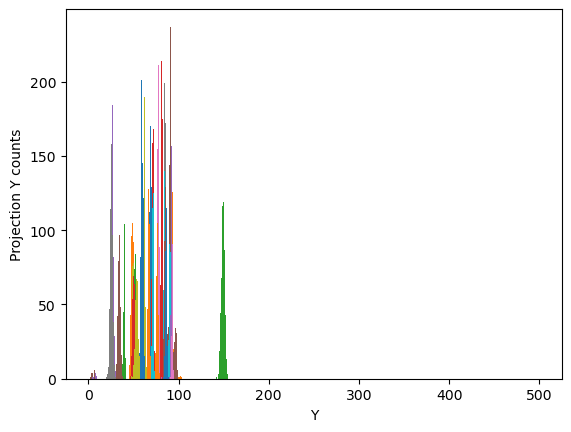

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import avg,mode
import numpy as np

spark = SparkSession.builder.master("local[10]").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")
spark._jvm.decoders.HRTDCDecoder.registerUDF(spark._jsparkSession)
spark._jvm.decoders.HRTDCUnpairedDecoder.registerUDF(spark._jsparkSession)

#パラメータ=184444
#threshold=20.0mV

#8chずつ取ったparquetファイルを結合(df. 0.26985pC)
cha = spark.read.parquet("./parquet/run0075_srppac.parquet")
chb = spark.read.parquet("./parquet/run0076_srppac.parquet")
chc = spark.read.parquet("./parquet/run0077_srppac.parquet")
chd = spark.read.parquet("./parquet/run0078_srppac.parquet")

df = cha.union(chb).union(chc).union(chd)
#df.show(5)

from hist.sparkHist2d import Hist2DArrays
from hist.sparkHist1d import Hist1D
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from hist.projection import ProjectionY

d, xedges, yedges = Hist2DArrays(df, [f"id_x",f"charge_x"],[33,500],[[-0.5,32.5],[0,500]],  interpolation='none', norm=LogNorm())
plt.show()

calib = []

#各idのmodeを求める
for i in range(32):
    projH, projXedges = ProjectionY(d, xedges, yedges, i, i)
    mode = np.argmax(projH)
    calib.append((i, mode))
   
#csvに保存
np.array(calib)
np.savetxt("calib/asagiidcalib_184444_th20mV_0.3pC.csv",np.array(calib), delimiter=",", header="id,0.26985pC", comments='', fmt='%d,%d')

Statistics:
[[   0.    0.    0.]
 [   0. 8361.    0.]
 [   0.    0.    0.]]


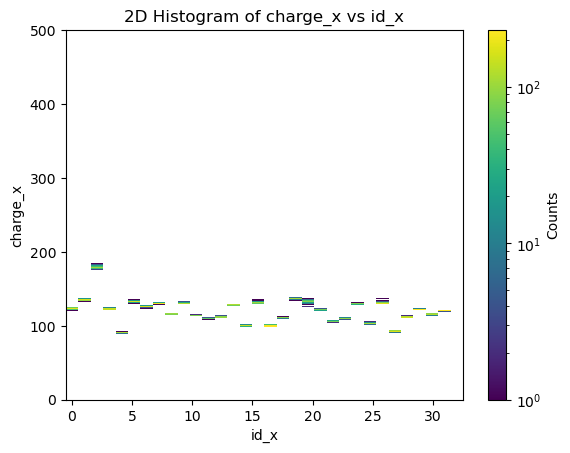

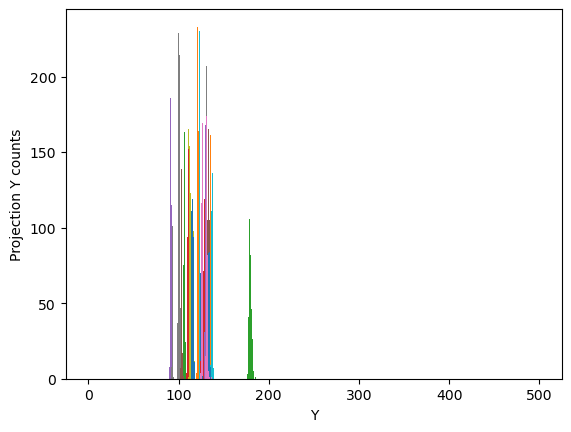

In [ ]:
#8chずつ取ったparquetファイルを結合(Mid. 0.49995pC)
cha = spark.read.parquet("./parquet/run0062_srppac.parquet")
chb = spark.read.parquet("./parquet/run0063_srppac.parquet")
chc = spark.read.parquet("./parquet/run0064_srppac.parquet")
chd = spark.read.parquet("./parquet/run0065_srppac.parquet")

df = cha.union(chb).union(chc).union(chd)
#df.show(5)

from hist.sparkHist2d import Hist2DArrays
from hist.sparkHist1d import Hist1D
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from hist.projection import ProjectionY

d, xedges, yedges = Hist2DArrays(df, [f"id_x",f"charge_x"],[33,500],[[-0.5,32.5],[0,500]],  interpolation='none', norm=LogNorm())
plt.show()

calib = []

#各idのmodeを求める
for i in range(32):
    projH, projXedges = ProjectionY(d, xedges, yedges, i, i)
    mode = np.argmax(projH)
    calib.append((i, mode))
   
#csvに保存
np.array(calib)
np.savetxt("calib/asagiidcalib_184444_th20mV_0.5pC.csv",np.array(calib), delimiter=",", header="id,0.49995pC", comments='', fmt='%d,%d')

Statistics:
[[    0.     0.     0.]
 [    0. 10558.     0.]
 [    0.     0.     0.]]


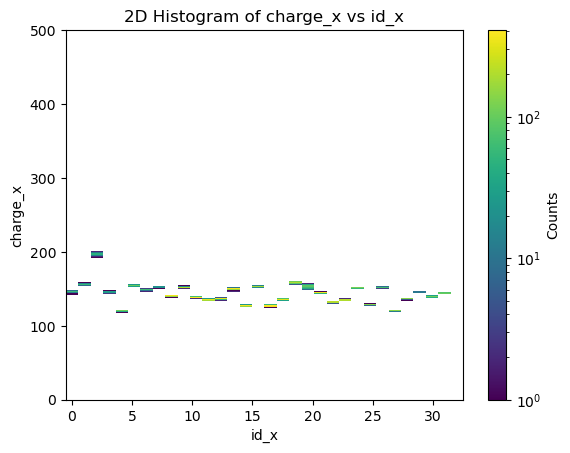

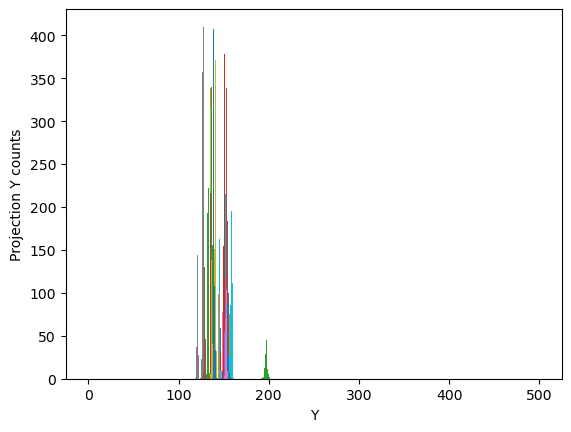

In [ ]:
#8chずつ取ったparquetファイルを結合(Max. 0.75000pC)
cha = spark.read.parquet("./parquet/run0066_srppac.parquet")
chb = spark.read.parquet("./parquet/run0067_srppac.parquet")
chc = spark.read.parquet("./parquet/run0068_srppac.parquet")
chd = spark.read.parquet("./parquet/run0069_srppac.parquet")

df = cha.union(chb).union(chc).union(chd)
#df.show(5)

from hist.sparkHist2d import Hist2DArrays
from hist.sparkHist1d import Hist1D
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from hist.projection import ProjectionY

d, xedges, yedges = Hist2DArrays(df, [f"id_x",f"charge_x"],[33,500],[[-0.5,32.5],[0,500]],  interpolation='none', norm=LogNorm())
plt.show()

calib = []

#各idのmodeを求める
for i in range(32):
    projH, projXedges = ProjectionY(d, xedges, yedges, i, i)
    mode = np.argmax(projH)
    calib.append((i, mode))
   
#csvに保存
np.array(calib)
np.savetxt("calib/asagiidcalib_184444_th20mV_0.75pC.csv",np.array(calib), delimiter=",", header="id,0.75000pC", comments='', fmt='%d,%d')